### Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm

In [14]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
print("X::\n",X)

y = pd.DataFrame(iris.target)
y.columns = ['Targets']
print("y::\n",y)

X::
      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
y::
      Targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [15]:
'''
names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Species']
dataset = pd.read_csv("Iris.csv", names=names)
X = dataset.iloc[:, :-1]  
label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 
y = [label[c] for c in dataset.iloc[:, -1]]
'''

'\nnames = [\'Sepal_Length\',\'Sepal_Width\',\'Petal_Length\',\'Petal_Width\', \'Species\']\ndataset = pd.read_csv("Iris.csv", names=names)\nX = dataset.iloc[:, :-1]  \nlabel = {\'Iris-setosa\': 0,\'Iris-versicolor\': 1, \'Iris-virginica\': 2} \ny = [label[c] for c in dataset.iloc[:, -1]]\n'

The accuracy score of K-Mean:
  0.24
The Confusion matrix of K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]

      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
72       0.553333    -1.282963      0.649083     0.395774
144      1.038005     0.558611      1.103783     1.712096
53      -0.416010    -1.743357      0.137547     0.132510
71       0.310998    -0.592373      0.137547     0.132510
51       0.674501     0.328414      0.421734     0.395774

The accuracy score of EM:  0.9666666666666667
The Confusion matrix of EM:
  [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


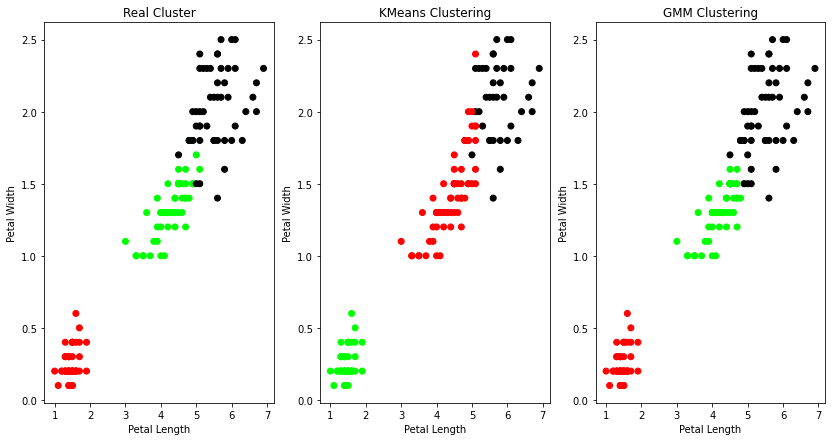

In [16]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1) # row,col,index
plt.title('Real Cluster')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets])

# K-Means PLOT
model=KMeans(n_clusters=3,random_state=0)
model.fit(X)
plt.subplot(1,3,2)
plt.title('KMeans Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_])

print('The accuracy score of K-Mean:\n ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrix of K-Mean:\n',sm.confusion_matrix(y, model.labels_))


# transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xas = scaler.transform(X)
xs = pd.DataFrame(xas, columns = X.columns)
print("\n",xs.sample(5))

# GMM PLOT (EM algorithm)
gmm=GaussianMixture(n_components=3, random_state=0)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm])

print('\nThe accuracy score of EM: ',sm.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',sm.confusion_matrix(y, y_cluster_gmm))

print('\nObservation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')